In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
%matplotlib inline

In [55]:
df = pd.read_csv('C:/Users/Ja/Desktop/Machine learning/klatki z symulatora/driving_log.csv',
                names=['center', 'left', 'right', 'steering_angle', 'throttle', 'break', 'speed'])

df.head()

,center,left,right,steering_angle,throttle,break,speed
0,C:\Users\Ja\Desktop\Machine learning\klatki z ...,C:\Users\Ja\Desktop\Machine learning\klatki z ...,C:\Users\Ja\Desktop\Machine learning\klatki z ...,0.0,0.0,0,0.000010
1,C:\Users\Ja\Desktop\Machine learning\klatki z ...,C:\Users\Ja\Desktop\Machine learning\klatki z ...,C:\Users\Ja\Desktop\Machine learning\klatki z ...,0.0,0.0,0,0.000003
2,C:\Users\Ja\Desktop\Machine learning\klatki z ...,C:\Users\Ja\Desktop\Machine learning\klatki z ...,C:\Users\Ja\Desktop\Machine learning\klatki z ...,0.0,0.0,0,0.000006
3,C:\Users\Ja\Desktop\Machine learning\klatki z ...,C:\Users\Ja\Desktop\Machine learning\klatki z ...,C:\Users\Ja\Desktop\Machine learning\klatki z ...,0.0,0.0,0,0.000016
4,C:\Users\Ja\Desktop\Machine learning\klatki z ...,C:\Users\Ja\Desktop\Machine learning\klatki z ...,C:\Users\Ja\Desktop\Machine learning\klatki z ...,0.0,0.0,0,0.000014


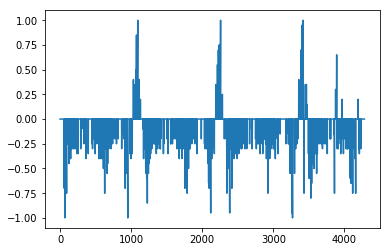

In [56]:
df['steering_angle'].plot()

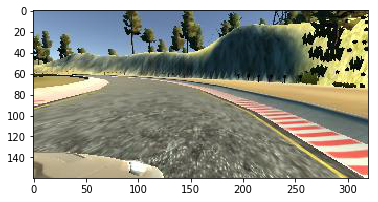

In [57]:
img = Image.open(df['right'][0])
plt.imshow(img)

In [58]:
img = np.asarray(img)
img.shape

(160, 320, 3)

In [59]:
def loadImage(fname):
    return np.asarray(Image.open(fname))
def process_image(img):
    return img[10:130:2, ::4, :]

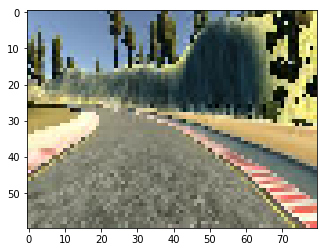

In [64]:
img = process_image(loadImage(df['center'][0]))
plt.imshow(img)


In [67]:
X = [process_image(loadImage(fname)) for fname in df['center']]
X += [process_image(loadImage(fname)) for fname in df['left']]
X += [process_image(loadImage(fname)) for fname in df['right']]

y = np.array(df['steering_angle'])
y = np.concatenate([y, y+0.4, y-0.4])

In [68]:
X = np.array(X)
print(X.shape)
print(y.shape)

(12846, 60, 80, 3)
(12846,)


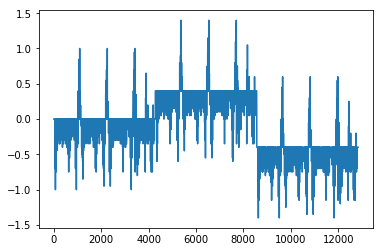

In [69]:
plt.plot(y)
plt.show();

In [70]:
np.save('X.npy',X)
np.save('y.npy',y)